In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255) 
test_datagen = ImageDataGenerator(rescale = 1./255) 

train_generator = train_datagen.flow_from_directory("/Users/keerthi/BigHaat Internship/train_img_path", target_size =(150, 150), 
													batch_size = 10, class_mode = "binary") 

validation_generator = test_datagen.flow_from_directory("/Users/keerthi/BigHaat Internship/val_img_path", target_size =(150, 150), 
													batch_size = 2, class_mode = "binary") 


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [9]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input

model = models.Sequential()
model.add(Input(shape=(150, 150, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# Add other layers as before

model.add(layers.MaxPooling2D((2, 2))) 

model.add(layers.Conv2D(64, (3, 3), activation ='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 

model.add(layers.Conv2D(128, (3, 3), activation ='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 

model.add(layers.Conv2D(128, (3, 3), activation ='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 

model.add(layers.Flatten()) 

model.add(layers.Dense(512, activation ='relu')) 
model.add(layers.Dense(1, activation ="sigmoid")) 

model.summary() 


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from keras import optimizers 

model.compile(
    loss="binary_crossentropy", 
    optimizer=optimizers.RMSprop(learning_rate=1e-4), 
    metrics=['accuracy']
)



In [17]:
history = model.fit(train_generator, steps_per_epoch = 100, epochs = 30, 
validation_data = validation_generator, validation_steps = 50) 


Epoch 1/30
 56/100 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - accuracy: 0.5099 - loss: 0.8882

2024-08-24 21:00:36.947497: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 120ms/step - accuracy: 0.5194 - loss: 0.8289 - val_accuracy: 0.5000 - val_loss: 0.6982
Epoch 2/30
 56/100 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step - accuracy: 0.6235 - loss: 0.6677

2024-08-24 21:00:50.843639: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - accuracy: 0.6130 - loss: 0.6691 - val_accuracy: 0.7000 - val_loss: 0.6595
Epoch 3/30


2024-08-24 21:00:51.319591: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 56/100 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step - accuracy: 0.5979 - loss: 0.6570

2024-08-24 21:01:03.631467: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.6105 - loss: 0.6568 - val_accuracy: 0.4700 - val_loss: 0.7177
Epoch 4/30
 56/100 ━━━━━━━━━━━━━━━━━━━━ 8s 196ms/step - accuracy: 0.6068 - loss: 0.6461

2024-08-24 21:01:16.915314: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - accuracy: 0.6242 - loss: 0.6413 - val_accuracy: 0.6250 - val_loss: 0.6303
Epoch 5/30


2024-08-24 21:01:17.388367: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 56/100 ━━━━━━━━━━━━━━━━━━━━ 11s 252ms/step - accuracy: 0.7199 - loss: 0.5710

2024-08-24 21:01:32.674336: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - accuracy: 0.7080 - loss: 0.5811 - val_accuracy: 0.5300 - val_loss: 0.6689
Epoch 6/30
 56/100 ━━━━━━━━━━━━━━━━━━━━ 9s 219ms/step - accuracy: 0.6908 - loss: 0.5732

2024-08-24 21:01:48.257520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 129ms/step - accuracy: 0.6973 - loss: 0.5689 - val_accuracy: 0.5250 - val_loss: 0.7647
Epoch 7/30


2024-08-24 21:01:48.967156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 56/100 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - accuracy: 0.7035 - loss: 0.5360

2024-08-24 21:02:02.189189: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 133ms/step - accuracy: 0.7131 - loss: 0.5310 - val_accuracy: 0.5500 - val_loss: 0.7542
Epoch 8/30
 56/100 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - accuracy: 0.7642 - loss: 0.4726

2024-08-24 21:02:18.102134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 137ms/step - accuracy: 0.7574 - loss: 0.4859 - val_accuracy: 0.6500 - val_loss: 0.6366
Epoch 9/30


2024-08-24 21:02:18.747193: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 56/100 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - accuracy: 0.8039 - loss: 0.4670

2024-08-24 21:02:30.911788: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step - accuracy: 0.7930 - loss: 0.4741 - val_accuracy: 0.6100 - val_loss: 0.7041
Epoch 10/30
 56/100 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step - accuracy: 0.8297 - loss: 0.4004

2024-08-24 21:02:45.242249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - accuracy: 0.8225 - loss: 0.4183 - val_accuracy: 0.6000 - val_loss: 0.7587
Epoch 11/30


2024-08-24 21:02:45.816123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 56/100 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.7882 - loss: 0.4197

2024-08-24 21:02:59.498286: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 141ms/step - accuracy: 0.7968 - loss: 0.4089 - val_accuracy: 0.6100 - val_loss: 0.7133
Epoch 12/30
 56/100 ━━━━━━━━━━━━━━━━━━━━ 10s 242ms/step - accuracy: 0.8557 - loss: 0.3560

2024-08-24 21:03:15.572160: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 141ms/step - accuracy: 0.8528 - loss: 0.3593 - val_accuracy: 0.6250 - val_loss: 0.7859
Epoch 13/30


2024-08-24 21:03:16.218323: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 56/100 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - accuracy: 0.8436 - loss: 0.3479

2024-08-24 21:03:30.284968: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 141ms/step - accuracy: 0.8571 - loss: 0.3398 - val_accuracy: 0.6400 - val_loss: 0.7801
Epoch 14/30
 56/100 ━━━━━━━━━━━━━━━━━━━━ 9s 215ms/step - accuracy: 0.9001 - loss: 0.3018

2024-08-24 21:03:44.754847: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 125ms/step - accuracy: 0.8951 - loss: 0.3016 - val_accuracy: 0.6250 - val_loss: 0.8091
Epoch 15/30


2024-08-24 21:03:45.298980: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 56/100 ━━━━━━━━━━━━━━━━━━━━ 13s 313ms/step - accuracy: 0.9018 - loss: 0.2679

2024-08-24 21:04:04.052156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - accuracy: 0.9000 - loss: 0.2683 - val_accuracy: 0.5700 - val_loss: 0.8550
Epoch 16/30
 56/100 ━━━━━━━━━━━━━━━━━━━━ 14s 328ms/step - accuracy: 0.9324 - loss: 0.2335

2024-08-24 21:04:26.166359: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 187ms/step - accuracy: 0.9369 - loss: 0.2240 - val_accuracy: 0.6250 - val_loss: 0.9680
Epoch 17/30


2024-08-24 21:04:26.631881: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 56/100 ━━━━━━━━━━━━━━━━━━━━ 10s 244ms/step - accuracy: 0.9286 - loss: 0.2073

2024-08-24 21:04:41.334978: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 150ms/step - accuracy: 0.9300 - loss: 0.2024 - val_accuracy: 0.6700 - val_loss: 0.8017
Epoch 18/30
 56/100 ━━━━━━━━━━━━━━━━━━━━ 10s 243ms/step - accuracy: 0.9587 - loss: 0.1472

2024-08-24 21:04:57.568471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 145ms/step - accuracy: 0.9548 - loss: 0.1535 - val_accuracy: 0.6500 - val_loss: 0.8764
Epoch 19/30


2024-08-24 21:04:58.498769: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 56/100 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.9501 - loss: 0.1595

2024-08-24 21:05:13.818595: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 157ms/step - accuracy: 0.9507 - loss: 0.1533 - val_accuracy: 0.6300 - val_loss: 0.8520
Epoch 20/30
 56/100 ━━━━━━━━━━━━━━━━━━━━ 10s 248ms/step - accuracy: 0.9706 - loss: 0.1173

2024-08-24 21:05:31.075437: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 144ms/step - accuracy: 0.9725 - loss: 0.1164 - val_accuracy: 0.6500 - val_loss: 0.8859
Epoch 21/30


2024-08-24 21:05:31.635500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 56/100 ━━━━━━━━━━━━━━━━━━━━ 11s 262ms/step - accuracy: 0.9786 - loss: 0.0880

2024-08-24 21:05:47.513527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 164ms/step - accuracy: 0.9777 - loss: 0.0928 - val_accuracy: 0.6100 - val_loss: 1.2207
Epoch 22/30
 56/100 ━━━━━━━━━━━━━━━━━━━━ 11s 262ms/step - accuracy: 0.9871 - loss: 0.0691

2024-08-24 21:06:05.028073: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 152ms/step - accuracy: 0.9841 - loss: 0.0701 - val_accuracy: 0.6750 - val_loss: 1.1211
Epoch 23/30


2024-08-24 21:06:05.632916: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 56/100 ━━━━━━━━━━━━━━━━━━━━ 11s 255ms/step - accuracy: 0.9918 - loss: 0.0616

2024-08-24 21:06:21.304046: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 162ms/step - accuracy: 0.9899 - loss: 0.0634 - val_accuracy: 0.6600 - val_loss: 0.9827
Epoch 24/30
 56/100 ━━━━━━━━━━━━━━━━━━━━ 9s 214ms/step - accuracy: 0.9964 - loss: 0.0449

2024-08-24 21:06:36.449289: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 124ms/step - accuracy: 0.9948 - loss: 0.0463 - val_accuracy: 0.6250 - val_loss: 0.8018
Epoch 25/30


2024-08-24 21:06:36.902800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 56/100 ━━━━━━━━━━━━━━━━━━━━ 9s 219ms/step - accuracy: 0.9939 - loss: 0.0347

2024-08-24 21:06:50.259961: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 138ms/step - accuracy: 0.9926 - loss: 0.0359 - val_accuracy: 0.6900 - val_loss: 1.1693
Epoch 26/30
 56/100 ━━━━━━━━━━━━━━━━━━━━ 9s 207ms/step - accuracy: 0.9966 - loss: 0.0298

2024-08-24 21:07:04.429971: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - accuracy: 0.9957 - loss: 0.0330 - val_accuracy: 0.6000 - val_loss: 1.6483
Epoch 27/30


2024-08-24 21:07:04.976774: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 56/100 ━━━━━━━━━━━━━━━━━━━━ 10s 241ms/step - accuracy: 0.9977 - loss: 0.0230

2024-08-24 21:07:19.323280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 148ms/step - accuracy: 0.9979 - loss: 0.0228 - val_accuracy: 0.5200 - val_loss: 2.0219
Epoch 28/30
 56/100 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 0.9894 - loss: 0.0311

2024-08-24 21:07:33.041639: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - accuracy: 0.9917 - loss: 0.0272 - val_accuracy: 0.7250 - val_loss: 0.8012
Epoch 29/30


2024-08-24 21:07:33.576446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 56/100 ━━━━━━━━━━━━━━━━━━━━ 9s 217ms/step - accuracy: 1.0000 - loss: 0.0147

2024-08-24 21:07:46.809328: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 139ms/step - accuracy: 1.0000 - loss: 0.0134 - val_accuracy: 0.6700 - val_loss: 1.6573
Epoch 30/30
 56/100 ━━━━━━━━━━━━━━━━━━━━ 13s 310ms/step - accuracy: 0.9970 - loss: 0.0116

2024-08-24 21:08:06.896086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 177ms/step - accuracy: 0.9959 - loss: 0.0135 - val_accuracy: 0.7000 - val_loss: 0.9811


2024-08-24 21:08:07.312647: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


(1, 150, 150, 3)


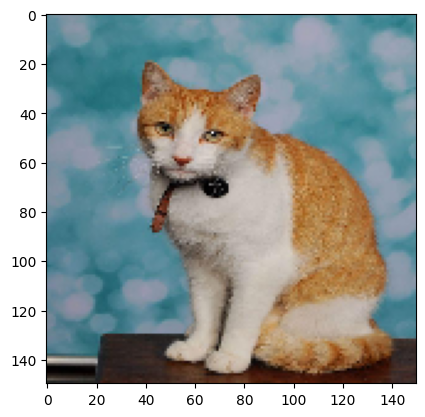

In [22]:
from keras.preprocessing import image 
import numpy as np 

# Pre-processing the image 
img = image.load_img("/Users/keerthi/BigHaat Internship/val_img_path/cats/cat_1.jpg", target_size = (150, 150)) 
img_tensor = image.img_to_array(img) 
img_tensor = np.expand_dims(img_tensor, axis = 0) 
img_tensor = img_tensor / 255.

# Print image tensor shape 
print(img_tensor.shape) 

# Print image 
import matplotlib.pyplot as plt 
plt.imshow(img_tensor[0]) 
plt.show() 


In [29]:
# Outputs of the 8 layers, which include conv2D and max pooling layers 
layer_outputs = [layer.output for layer in model.layers[:8]] 




activation_model = models.Model(inputs = model.inputs, outputs = layer_outputs) 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
(1, 148, 148, 32)


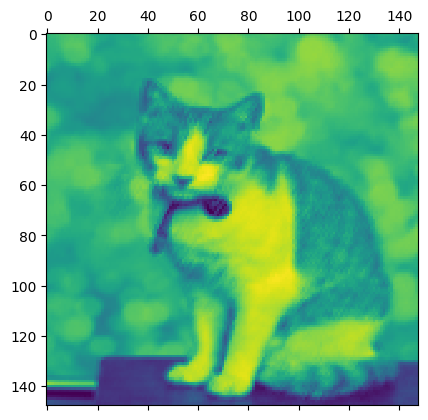

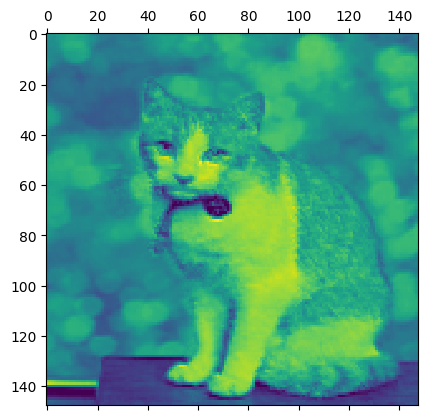

In [30]:
activations = activation_model.predict(img_tensor) 

# Getting Activations of first layer 
first_layer_activation = activations[0] 

# shape of first layer activation 
print(first_layer_activation.shape) 

# 6th channel of the image after first layer of convolution is applied 
plt.matshow(first_layer_activation[0, :, :, 6], cmap ='viridis') 

# 15th channel of the image after first layer of convolution is applied 
plt.matshow(first_layer_activation[0, :, :, 15], cmap ='viridis') 

In [32]:
layer_names = [] 

for layer in model.layers[:8]: 
    layer_names.append(layer.name) 
print(layer_names) 


['conv2d_8', 'max_pooling2d_8', 'conv2d_9', 'max_pooling2d_9', 'conv2d_10', 'max_pooling2d_10', 'conv2d_11', 'max_pooling2d_11']
